<img src='Image/CBG18.png' width="220px" align="right"> <img src='Image/uff-logo.png' width="200px" align="left"> <img src='Image/logon.jpg' width="200px" align="center"> 

### <center size=2> Real data example : Paraná Basin, Brazil <center> 
    

--------------------------------------------------------------------------------------------------------------------

In [1]:
#----------------------------- INTERNAL PACKAGES --------------------------- #
import numpy as np
import numpy.ma as ma
import ipywidgets as widgets
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.mlab as ml
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import Latex
from scipy import stats
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from scipy.interpolate import griddata
from pandas import Series, DataFrame
from mpl_toolkits.mplot3d import axes3d
import pylab as py
%matplotlib tk
#________________________________________________________________________________#

# Geologia Regional e Contexto Geotectônico da Área de Estudo

> A Bacia do Paraná desenvolveu-se sobre uma área de escudo do continente Gondwana Sul e é composta por uma série de núcleos cratônicos, rodeados por vários cinturões móveis e cobertos por bacias molássicas, que foram desenvolvidas durante o ciclo termo-tectônico Brasiliano que se estendeu desde o neoproterozóico até o Ordoviciano. A deformação decorrente deste ciclo teve início entre 700 Ma e 650 Ma, sendo que a maior parte das intrusões de granitos que podemos observar na Bacia, situou-se dentro do limite entre o Proterozóico e o Paleozóico (cerca de 570 Ma) com resfriamento durante o Cambro-Ordoviciano entre 500-450 Ma (Zalan, 1987; Hawkesworth,2000).
>
> O embasamento que circunda a Bacia do Paraná é dividido em: margem Leste/Sudeste, representado pelas faixas Dom Feliciano e Ribeira ,de idade Brasiliana e de direção NE-SW, separados por um núcleo cratônico designado Rio de La Plata/ Luiz Alves; margem Norte/Nordeste, representada pela faixa Uruaçu, de idade mesoproterozóica, de direção NW e por dois maciços arqueanos (Guaxupé e Goiás) remobilizados durante o ciclo Brasiliano; margem Oeste/Noroeste representada pela faixa de dobramentos Paraguai/Araguaia, também do ciclo Brasiliano, que delimita o extremo da borda Noroeste da Bacia (Hawkesworth, 2000; Borghi, 2002) .
>
> Dentre os principais grupos de estruturas, nota-se três grupos de lineamentos de direções preferenciais NW-SE, E-W e NE-SW, representando cada um evento termo-tectônico distinto. O conjunto de lineamentos NW-SE são os mais antigos e estão relacionados ao evento  termo-tectônico do Transamazônico, e, as zonas de falhas geológicas associadas a este evento foram reativadas durante o rifteamento do Atlântico Sul, no Cretáceo.  Os lineamentos E-W, tiveram início a partir do Triássico e são paralelos às zonas de fratura oceânica, sugerindo uma ligação com o desenvolvimento do Atlântico Sul. Os lineamentos NE-SW são derivados do evento tremo-tectônico Brasiliano e de seus cinturões móveis associados. Este último conjunto de lineamentos é isento de diques de basalto (Milani, 1999). 
>
> O registro estratigráfico da Bacia do Paraná é formado por pacote sedimentar e magmático de espessura máxima em torno de 7000 m, que coincide geograficamente com o depocentro estrutural da sinéclise e com a calha do rio paraná (Milani,1998). O registro estratigráfico da Bacia do Paraná é dividido em seis unidades de ampla escala ou supersequências (Vail, 1977) na forma de pacotes rochosos com intervalos temporais de algumas dezenas de milhões de anos de duração e envelopados por superfícies de discordância de caráter inter-regional: Rio Ivaí (Ordoviciano-Siluriano), Paraná (Devoniano), Gondwana I (Carbonífero-Eotriássico), Gondwana II (Meso a Neotriássico), Gondwana III (Neojurássico-Eocretáceo) e Bauru (Neocretáceo). As três primeiras supersequências são representadas por sucessões sedimentares que definem ciclos transgressivos e regressivos ligados às oscilações do nível relativo do mar, durante o Paleozóico, ao passo que as demais correspondem a pacotes de sedimentos continentais com rochas ígneas associadas. As unidades formais da litoestratigrafia, quais sejam os grupos, formações e membros comumente utilizados na descrição do arranjo espacial dos estratos da bacia, inserem-se como elementos particularizados neste arcabouço aloestratigráfico de escala regional (boletim_2007).
>
> O mapa geológico-estrutural abaixo apresenta as formações aflorantes bem como as principais lineamentos e o Arco de Ponta Grossa e a localização da área de estudo.

  <img src='Image/Figure1revision.png' width="750px" align="center">

# Typical rock densities for Paraná Sedimentary Basin (Geology information)


|       Geological Formation       | Densities(g/cm³)| Depositions Cycles  |
|----------------------------------|-----------------|---------------------|
|Serra Geral                       |      2.80       |     Gondwana III    |
|Botucatu                          |      2.33       |     Gondwana III    | 
|Pirambóia                         |      2.47       |      Gondwana I     | 
|Rio do Rasto                      |      2.40       |      Gondwana I     |
|Teresina                          |      2.50       |      Gondwana I     |
|Irati                             |      2.60       |      Gondwana I     |
|Palermo                           |      2.55       |      Gondwana I     |
|Rio Bonito                        |      2.57       |      Gondwana I     |
|Taciba (Mb. Chapeo do Sol)        |      2.63       |      Gondwana I     |
|Campo Mourão                      |      2.60       |      Gondwana I     |
|Lagoa Azul (Mb. Taquaral)         |      2.63       |      Gondwana I     |
|Lagoa Azul (Mb. Cuiaba Paulista)  |      2.57       |      Gondwana I     |
|Ponta Grossa                      |      2.60       |        Paraná       |
|Furnas                            |      2.20       |        Paraná       |
|Vila Maria                        |      2.23       |       Rio Ivaí      |
|Embasamento                       |      2.75       |    Pré-Cambriano    |


# <center> Start coding from here on ! <center>

In [2]:
# ------------- Use pandas to read the real data -----------------:
names = ['Lat','Lon','mGal']
data = pd.read_csv( 'Real/Grav.txt', sep=',', names=names )
print(data)

               Lat        Lon      mGal
0       -23.737157 -53.401241  8.508879
1       -23.737165 -53.401241  8.508970
2       -23.737172 -53.401241  8.509061
3       -23.737179 -53.401241  8.509153
4       -23.737186 -53.401241  8.509244
5       -23.737194 -53.401241  8.509335
6       -23.737201 -53.401241  8.509426
7       -23.737208 -53.401241  8.509517
8       -23.737215 -53.401241  8.509608
9       -23.737222 -53.401241  8.509699
10      -23.737230 -53.401241  8.509790
11      -23.737237 -53.401241  8.509882
12      -23.737244 -53.401241  8.509973
13      -23.737251 -53.401241  8.510064
14      -23.737259 -53.401241  8.510155
15      -23.737266 -53.401241  8.510246
16      -23.737273 -53.401241  8.510337
17      -23.737280 -53.401241  8.510428
18      -23.737287 -53.401241  8.510520
19      -23.737295 -53.401241  8.510611
20      -23.737302 -53.401241  8.510702
21      -23.737309 -53.401241  8.510793
22      -23.737316 -53.401241  8.510884
23      -23.737324 -53.401241  8.510975


In [3]:
# ------------- Use pandas to read the topographic data -----------------:
names = ['Lat', 'Lon', 'Elev']
topo = pd.read_csv('Real/Topo.txt', sep=',', names=names)
print topo

               Lat        Lon        Elev
0       -23.737157 -53.401241  338.238342
1       -23.737165 -53.401241  338.217446
2       -23.737172 -53.401241  338.196551
3       -23.737179 -53.401241  338.175655
4       -23.737186 -53.401241  338.154759
5       -23.737194 -53.401241  338.133864
6       -23.737201 -53.401241  338.112968
7       -23.737208 -53.401241  338.092072
8       -23.737215 -53.401241  338.071176
9       -23.737222 -53.401241  338.050280
10      -23.737230 -53.401241  338.029384
11      -23.737237 -53.401241  338.008488
12      -23.737244 -53.401241  337.987592
13      -23.737251 -53.401241  337.966696
14      -23.737259 -53.401241  337.945800
15      -23.737266 -53.401241  337.924904
16      -23.737273 -53.401241  337.904007
17      -23.737280 -53.401241  337.883111
18      -23.737287 -53.401241  337.862214
19      -23.737295 -53.401241  337.841318
20      -23.737302 -53.401241  337.820421
21      -23.737309 -53.401241  337.799524
22      -23.737316 -53.401241  337

#  <center size=3> Some useful tools of pandas: <center>

In [4]:
# sum all data per column:
#data.sum()["Lat"]
data.sum()

Lat    -2.377206e+07
Lon    -5.562959e+07
mGal    1.461482e+06
dtype: float64

In [5]:
topo.sum()

Lat    -2.377200e+07
Lon    -5.562953e+07
Elev    3.841826e+08
dtype: float64

In [6]:
# get the min value per column:
data.min()

Lat    -24.259810
Lon    -54.343458
mGal   -18.536044
dtype: float64

In [7]:
topo.min()

Lat     -24.259810
Lon     -54.343458
Elev    227.531600
dtype: float64

In [8]:
# get the max value per column:
data.max()

Lat    -21.025533
Lon    -51.744631
mGal    16.177325
dtype: float64

In [9]:
topo.max()

Lat     -21.025533
Lon     -51.744631
Elev    739.263910
dtype: float64

#  <center size=3> Plot the spacial distribution of the real data set and the topography: <center>

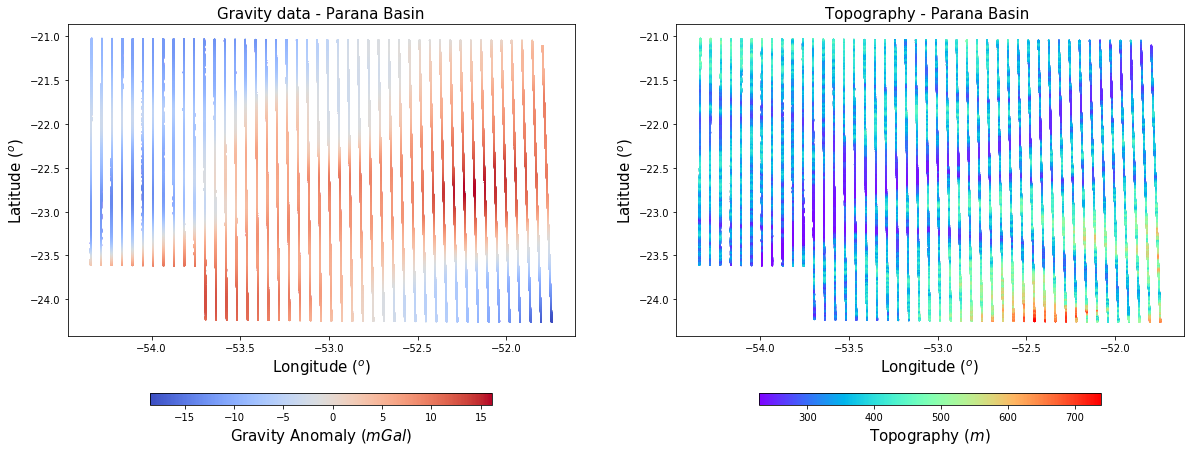

In [10]:
# ------------ plot the flight lines to check for the interpolation:--------#
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.title('Gravity data - Parana Basin',fontsize=15)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
p1 = plt.scatter(data['Lon'], data['Lat'], s=1.0, c=data['mGal'], marker='.', cmap=plt.cm.coolwarm)
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Gravity Anomaly $ (mGal) $',fontsize=15, rotation = 0)

###########################################################################################################################

plt.subplot(1,2,2)
plt.title('Topography - Parana Basin ',fontsize=15)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)

p2 = plt.scatter(topo['Lon'], topo['Lat'], s=1.0, c=topo['Elev'], marker='.', cmap=plt.cm.rainbow)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Topography $ (m) $',fontsize=15,rotation = 0)

plt.show()

# <center size=3>  Create a mesh to plot the real data flight: <center> 

In [11]:
# set the mesh spacial boundaries from real data by means of pandas commands:
#latmin = data.min()['Lat']
latmin = data.min()[0]
print 'min latitude = ', latmin
#lonmin = data.min()['Lon']
lonmin = data.min()[1]
print 'min longitude =', lonmin
#latmax = data.max()["Lat"]
latmax = data.max()[0]
print 'max latitude =', latmax
#lonmax = data.max()["Lon"]
lonmax = data.max()[1]
print 'max longitude =', lonmax

# define the number of data in both latitude and longitude directions: 
nlat = 200  # 825 - numer of lines collected from factoration of total number of data flight.
nlon = 200  # 1271

# create a linspace for longitudes:
x = np.linspace(lonmin, lonmax, nlon)
# and for latitudes:
y = np.linspace(latmin, latmax, nlat)
# mesh for interpolation:
LON,LAT = np.meshgrid(x,y)

min latitude =  -24.2598095578
min longitude = -54.3434576676
max latitude = -21.0255330029
max longitude = -51.7446306179


# <center size=3>   Interpolation of flight data: <center> 

In [12]:
# convert lists to mnemonic arrays to perform calculations:
#lat = (data.iloc[:,0]) # latitude
#lon = (data.iloc[:,1]) # longitude
#gz =  (data.iloc[:,2]) # gz
#top = topo.iloc[:,2]) # elevation

# Columns names as identificators:
lat = ( data["Lat"] ) # latitude
lon = ( data["Lon"] ) # longitude
gz  = ( data["mGal"]) # gz
top = ( topo["Elev"]) # elevation
#print lat, lon, gz, top

In [13]:
flight_obs = (lon,lat) # real observation positions
grid_obs   = (LON,LAT) # interpolated observation positions

# function of scipy for interpolation:
gzi  = griddata(flight_obs, gz, grid_obs , method='cubic') # gravity data interpolated in grid_obs observations

In [14]:
topi = griddata(flight_obs, top, grid_obs , method='linear')# topographic data interpolated in grid_obs observations

# <center size=3> Plot of the interpolated data for verification: <center>

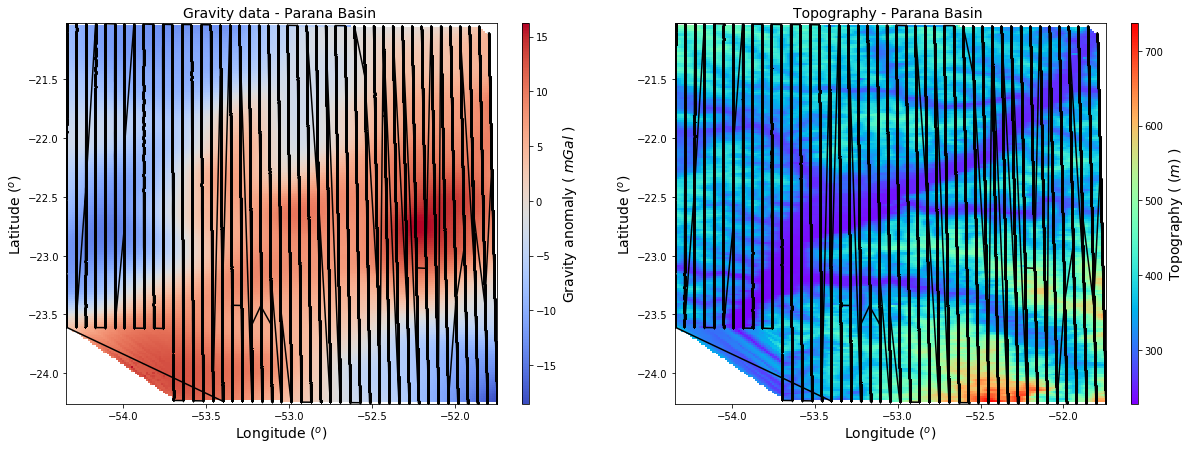

In [15]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
fs = 14 # fontsize

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Gravity data - Parana Basin ', fontsize = fs)
image = plt.imshow(gzi, cmap=plt.cm.coolwarm,interpolation="none", aspect='auto',
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# ------------ plot the flight lines to check for the interpolation:--------#
plt.plot(lon, lat, color='black', marker='.', markersize=0.5)

# colobar specifications:
cbar1 = plt.colorbar(image, aspect=60, fraction = 0.1, orientation="vertical")
cbar1.set_label('Gravity anomaly ( $ mGal$ )',fontsize=fs, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)

###########################################################################################################################

plt.subplot(1,2,2)

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Topography - Parana Basin ', fontsize = fs)
i2 = plt.imshow(topi, cmap=plt.cm.rainbow, interpolation="none", aspect='auto',
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# ------------ plot the flight lines to check for the interpolation:--------#
plt.plot(lon, lat, color='black', marker='.', markersize=0.5)

# colobar specifications:
cbar2 = plt.colorbar(i2, aspect=60, fraction = 0.1, orientation="vertical")
cbar2.set_label('Topography ( $ (m)$ )',fontsize=fs, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)

plt.show()

In [16]:
# ------------- copy the interpolated data into another array for convenience: -------------#
gzgrid = np.copy(gzi)
gzgrid = np.asarray(gzgrid)

topgrid = np.copy(topi)
topgrid = np.asarray(topgrid)
nx, ny = np.shape(topgrid)
print 'number of gridded points in longitude =', nx
print 'number of gridded points in latitude = ', ny

number of gridded points in longitude = 200
number of gridded points in latitude =  200


In [17]:
# ------------- Define the region where there is no flight lines (ONLY WORK FOR CORNES!): -----------------#
i = np.where(x <= -53.6) #and np.where(x>= -52.5)
j = np.where(y <= -23.5) #and np.where(y>= -22.5)
I,J = np.meshgrid(i,j)

# define nans for undesired regions: 
gzgrid[J,I] = np.nan
topgrid[J,I] = np.nan

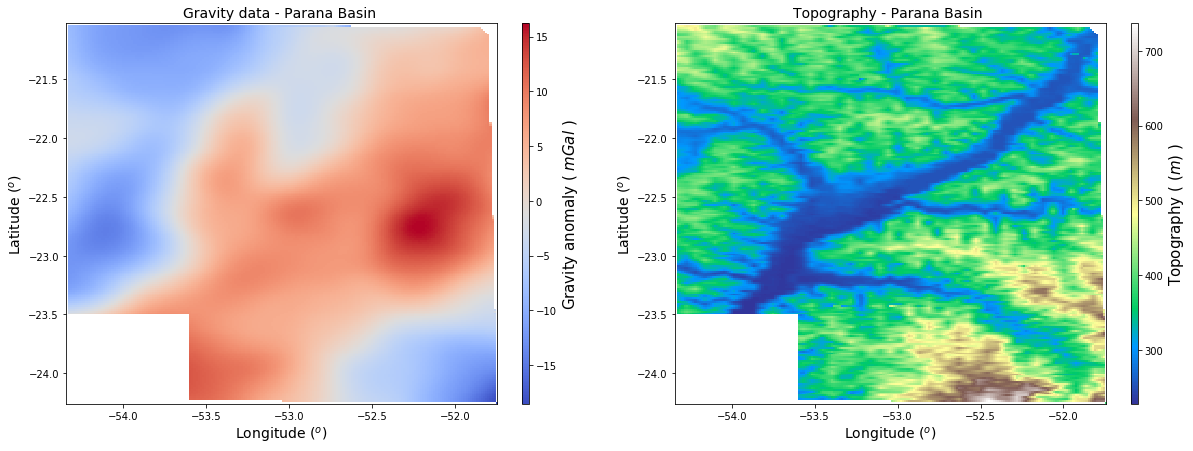

In [18]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
fs = 14 # fontsize!!!!

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Gravity data - Parana Basin ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p1 = plt.imshow(gzgrid, cmap=plt.cm.coolwarm,interpolation="none", aspect='auto',
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# color bar specifications:
cbar1 = plt.colorbar(p1, aspect=60, fraction = 0.1, orientation="vertical")
cbar1.set_label('Gravity anomaly ( $ mGal$ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       

###########################################################################################################################

plt.subplot(1,2,2)
# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Topography - Parana Basin ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p2 = plt.imshow(topgrid, cmap=plt.cm.terrain,interpolation="none", aspect='auto',
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# color bar specifications:
cbar2 = plt.colorbar(p2, aspect=60, fraction = 0.1, orientation="vertical")
cbar2.set_label('Topography ( $ (m) $ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       

plt.show()

# Delimiting a study region using Pandas commands:

In [19]:
# longitude filter:
target = data.loc[ (data['Lon']<= -51.7) & (data['Lon']>= -52.7) ] # should have the whitespace " LONG" !
# latitude filter:
target = target.loc[ (target['Lat']<= -22.3) & (target['Lat']>= -23.5) ]
# check if is right:
target.max(), target.min()

(Lat    -22.300016
 Lon    -51.758231
 mGal    16.177325
 dtype: float64, Lat    -23.499989
 Lon    -52.699999
 mGal    -3.297985
 dtype: float64)

In [20]:
# INterpolate the desired data 
# set the mesh limits from real data with pandas command presented above:
#latmin = data.min()['Lat']
lat1 = target.min()[0]
print 'min target latitude = ', lat1
#lonmin = data.min()['Lon']
lon1 = target.min()[1]
print 'min target longitude =', lon1
#latmax = data.max()["Lat"]
lat2 = target.max()[0]
print 'max target latitude =', lat2
#lonmax = data.max()["Lon"]
lon2 = target.max()[1]
print 'max target longitude =', lon2

# create a linspace for filtered longitudes:
targ_lon = np.linspace(lon1, lon2, 200, endpoint=True)
# and for filtered latitudes:
targ_lat = np.linspace(lat1, lat2, 200, endpoint=True)
# mesh for interpolation:
targ_LON, targ_LAT = np.meshgrid(targ_lon, targ_lat)

min target latitude =  -23.499988652
min target longitude = -52.6999990689
max target latitude = -22.3000159208
max target longitude = -51.7582314888


# <center> Perform interpolation of the target area : <center>

In [21]:
# working arrays for more clear code:
w1 = (np.array( target['Lon'] ), np.array( target['Lat']) )  # real coordinates
w2 = (targ_LON, targ_LAT) # interpolated coordinates
w3 = np.array( target['mGal'] ) # real gravity data
# function of scipy for interpolation:
targ_gzi = griddata( w1, w3 , w2, method='cubic',fill_value=np.nan)

In [22]:
print np.where(targ_gzi == np.nan)
print targ_gzi

(array([], dtype=int64), array([], dtype=int64))
[[        nan         nan         nan ...,         nan         nan
          nan]
 [        nan  3.97750987  3.94859685 ..., -3.21531267 -3.22182224
          nan]
 [        nan  4.02969827  4.00157596 ..., -3.14578948 -3.15333398
          nan]
 ..., 
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]]


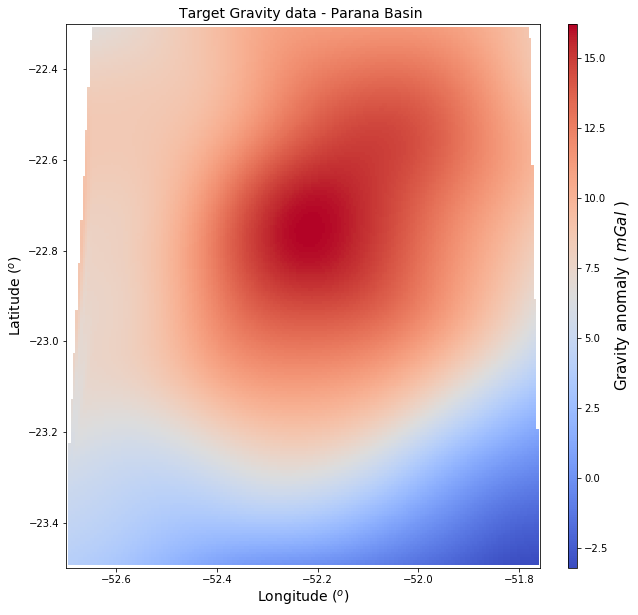

In [23]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
py.rcParams['figure.figsize'] = (10.0, 10.0) 
fig = plt.figure()
fs = 14 # fontsize!!!!

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Target Gravity data - Parana Basin ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p = plt.imshow(targ_gzi, cmap=plt.cm.coolwarm,interpolation="none", aspect='auto',
                origin='lower', extent=[lon1, lon2, lat1, lat2])

# color bar specifications:
cbar = fig.colorbar(p, aspect=60, fraction = 0.1, orientation="vertical")
cbar.set_label('Gravity anomaly ( $ mGal$ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       
plt.show()


#  <center> Let's plot the maps into more realistic Cartographic projections?? <center> 

In [24]:
# ------------------------- Define the center of the map -----------------------------------#  
lon0 = 0.5*(lonmin + lonmax)
lat0 = 0.5*(latmin + latmax)

# ------- use basemap function to create the plot : ---------# 
m = Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,
            urcrnrlon=lonmax,urcrnrlat=latmax, 
            resolution='l',projection='poly', 
            lon_0=lon0, lat_0=lat0,epsg=3395)

#m.arcgisimage(service='World_Shaded_Relief', xpixels = 150000, ypixels= 150000, verbose= True)
#plt.show()

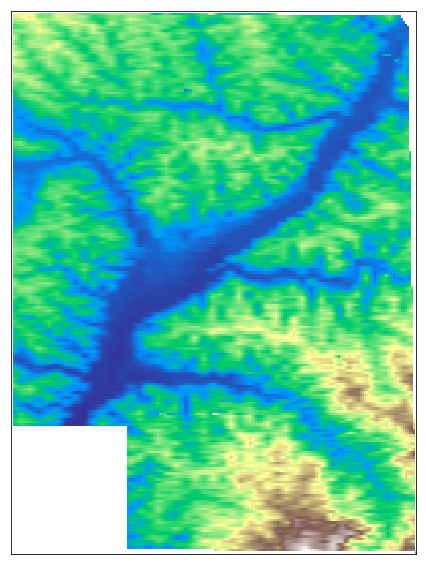

In [28]:
# -------- plot the data into maps -----------:
m.imshow(topgrid, cmap=plt.get_cmap('terrain'), alpha=1.0 )

In [26]:
# Use basemap to convert coordinates from Lon, Lat to utmx, utmy (the gravity does only work with utm coordinates):
utmx, utmy = m( LON, LAT )

# Proposed model for the region

In [38]:
# ------- define area for clicking in utmx, utmy using function Basemap:
utmx_min, utmy_min = m(lonmin, latmin)
utmx_max, utmy_max = m(lonmax, latmax)

area_xy = [utmx_min, utmx_max, utmy_min, utmy_max]
print area_xy
#area_rhoz = [2200.0, 2800.0, -np.max(np.array(topo['Elev']) ), 7000.0]
area_rhoz = [2200.0, 2800.0, -1800.0, 7000.0] # 1800 = flight hight
print area_rhoz

[0.0, 289300.10383057559, 2.864282578229904e-06, 387949.3837161865]
[2200.0, 2800.0, -739.26391020302003, 7000.0]


In [43]:
from modules.iplots import model_masses
from modules.sphere import sphere_gz

In [41]:
%matplotlib tk
x,y,z,rho = model_masses(area_xy, area_rhoz)

In [42]:
print len(x), len(y), len(z), len(rho)

23 23 23 23


In [48]:
# compute gravity anomaly produced by the clicked point masses:
# ------- compute gravity data for all clicked point masses:
# Calculating the gravity attraction for all point masses:
gz_pred = 0.0
nmasses = len(x)
# range of all masses:
for i in range( len(x) ):
    source=[]
    source = [ x[i], y[i], z[i], rho[i]/nmasses ]  # calling one source a time:
    #print source
    gz_pred += sphere_gz(utmx, utmy, -1800.0, source) # sum the effect of all masses

In [49]:
# -------- plot the data into maps -----------:
plt.figure(1)
m.imshow(gz_pred, cmap=plt.get_cmap('coolwarm'), alpha=1.0 )
plt.show()

In [50]:
plt.figure(2)
m.imshow(gzgrid, cmap=plt.get_cmap('coolwarm'), alpha=1.0 )
plt.show()